In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#Load the data


In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')


#Data Cleaning

In [2]:

# Fill missing Age values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common port
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare in test set with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop Cabin column as it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


NameError: name 'train_df' is not defined

#Feature Engineering

In [1]:
# Convert Sex to numerical values: male=0, female=1
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked to numerical values: S=0, C=1, Q=2
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create a new feature for family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1



NameError: name 'train_df' is not defined

Select Features and target

In [5]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']


#Split the data

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Train a model

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the model

Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



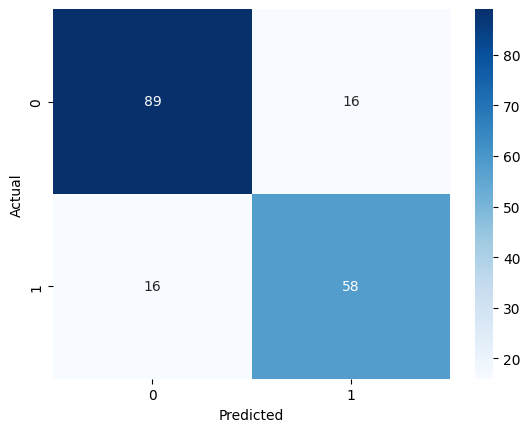

In [13]:
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print(classification_report(y_val, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show(30)


Make Prediction on the test set

In [9]:
X_test = test_df[features]
test_predictions = model.predict(X_test)

# Add predictions to the test dataframe
test_df['Survived'] = test_predictions


Save the prediction

In [19]:
submission_df = test_df[['Name','PassengerId','Age','Pclass' ,'Survived']]
submission_df.to_csv('data/titanic_predictions.csv', index=False)


In [20]:
submission_df.head(30)

,Name,PassengerId,Age,Pclass,Survived
0,"Kelly, Mr. James",892,34.5,3,0
1,"Wilkes, Mrs. James (Ellen Needs)",893,47.0,3,0
2,"Myles, Mr. Thomas Francis",894,62.0,2,0
3,"Wirz, Mr. Albert",895,27.0,3,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,22.0,3,1
5,"Svensson, Mr. Johan Cervin",897,14.0,3,0
6,"Connolly, Miss. Kate",898,30.0,3,0
7,"Caldwell, Mr. Albert Francis",899,26.0,2,0
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",900,18.0,3,1
9,"Davies, Mr. John Samuel",901,21.0,3,0
